* **Dropout Layers**
    * Dropout can be added to layers to "turn off" neurons during training to prevent overfitting.
    * Each Dropout layer will "drop" a user-defined percentage of neuron units in the previous layer every batch.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# EDA and Preprocessing

In [2]:
df = pd.read_csv('DATA/cancer_classification.csv')

In [3]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

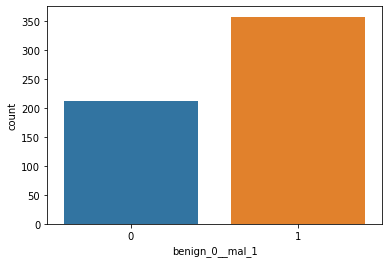

In [5]:
sns.countplot(x='benign_0__mal_1',data=df)

<AxesSubplot:>

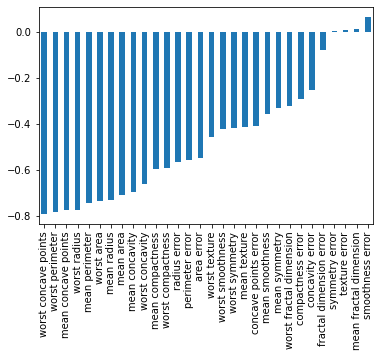

In [7]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

<AxesSubplot:>

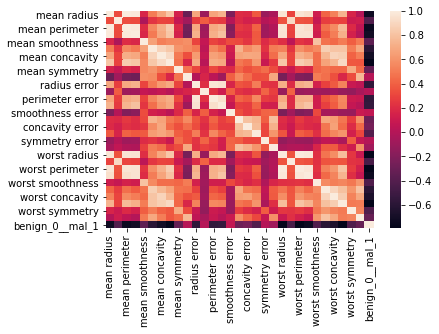

In [8]:
sns.heatmap(df.corr())

In [9]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [10]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()

In [15]:
X_train = scaler.fit_transform(X_train)

In [16]:
X_test = scaler.fit_transform(X_test)

# Dealing with Overfitting and Evaluation

In [17]:
from tensorflow.keras.models import Sequential

In [18]:
from tensorflow.keras.layers import Dense,Dropout

In [19]:
X_train.shape

(426, 30)

In [20]:
model = Sequential()

model.add(Dense(30,activation='relu'))

model.add(Dense(15,activation='relu'))

# BINARY CLASSIFICATION
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 3s 95ms/step - loss: 0.6771 - val_loss: 0.6478
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6390 - val_loss: 0.6040
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6019 - val_loss: 0.5594
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5498 - val_loss: 0.5085
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4954 - val_loss: 0.4545
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4492 - val_loss: 0.4040
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4085 - val_loss: 0.3574
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3504 - val_loss: 0.3131
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3275 - val_loss: 0.2846
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.2993 - val_loss: 0.2528
Epoch 11

14/14 [==============================] - 0s 4ms/step - loss: 0.0486 - val_loss: 0.2385
Epoch 84/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0496 - val_loss: 0.3044
Epoch 85/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0421 - val_loss: 0.2461
Epoch 86/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0528 - val_loss: 0.2788
Epoch 87/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0444 - val_loss: 0.2495
Epoch 88/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0353 - val_loss: 0.3198
Epoch 89/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0623 - val_loss: 0.2163
Epoch 90/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0598 - val_loss: 0.2868
Epoch 91/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0454 - val_loss: 0.2611
Epoch 92/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0416 - val_loss: 0.3188
Epoch 93/600


14/14 [==============================] - 0s 4ms/step - loss: 0.0400 - val_loss: 0.3749
Epoch 165/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0291 - val_loss: 0.3861
Epoch 166/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0384 - val_loss: 0.3990
Epoch 167/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0342 - val_loss: 0.4590
Epoch 168/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0355 - val_loss: 0.3616
Epoch 169/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0232 - val_loss: 0.4515
Epoch 170/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0317 - val_loss: 0.4463
Epoch 171/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0287 - val_loss: 0.4383
Epoch 172/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0428 - val_loss: 0.3517
Epoch 173/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0349 - val_loss: 0.5186
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0285 - val_loss: 0.6339
Epoch 246/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0209 - val_loss: 0.5307
Epoch 247/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0237 - val_loss: 0.5872
Epoch 248/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0345 - val_loss: 0.6208
Epoch 249/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0224 - val_loss: 0.5295
Epoch 250/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0205 - val_loss: 0.6102
Epoch 251/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0313 - val_loss: 0.5981
Epoch 252/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0279 - val_loss: 0.5756
Epoch 253/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0227 - val_loss: 0.6597
Epoch 254/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0398 - val_loss: 0.5191
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0234 - val_loss: 0.8048
Epoch 327/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0270 - val_loss: 0.8180
Epoch 328/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0176 - val_loss: 0.7268
Epoch 329/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0259 - val_loss: 0.7900
Epoch 330/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0157 - val_loss: 0.7021
Epoch 331/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0214 - val_loss: 0.7404
Epoch 332/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0177 - val_loss: 0.7387
Epoch 333/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0323 - val_loss: 0.7257
Epoch 334/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0217 - val_loss: 0.7442
Epoch 335/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0175 - val_loss: 0.7030
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0125 - val_loss: 0.9211
Epoch 408/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0257 - val_loss: 0.8137
Epoch 409/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0138 - val_loss: 0.9920
Epoch 410/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0232 - val_loss: 0.9012
Epoch 411/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0145 - val_loss: 0.8842
Epoch 412/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0166 - val_loss: 1.0128
Epoch 413/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0165 - val_loss: 0.8229
Epoch 414/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0167 - val_loss: 0.8932
Epoch 415/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0163 - val_loss: 0.9028
Epoch 416/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0110 - val_loss: 0.9199
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0118 - val_loss: 1.0404
Epoch 489/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0193 - val_loss: 0.8530
Epoch 490/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0279 - val_loss: 1.0196
Epoch 491/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0099 - val_loss: 1.0057
Epoch 492/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0095 - val_loss: 0.9652
Epoch 493/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0171 - val_loss: 0.9774
Epoch 494/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0168 - val_loss: 1.1225
Epoch 495/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0124 - val_loss: 0.9009
Epoch 496/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0138 - val_loss: 1.0122
Epoch 497/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0178 - val_loss: 0.9210
Epoc

14/14 [==============================] - 0s 4ms/step - loss: 0.0122 - val_loss: 1.0249
Epoch 570/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0144 - val_loss: 1.2704
Epoch 571/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0192 - val_loss: 0.9927
Epoch 572/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0081 - val_loss: 1.2030
Epoch 573/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0124 - val_loss: 1.1196
Epoch 574/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0103 - val_loss: 1.0787
Epoch 575/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0070 - val_loss: 1.1617
Epoch 576/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0129 - val_loss: 0.9788
Epoch 577/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0088 - val_loss: 1.2008
Epoch 578/600
14/14 [==============================] - 0s 4ms/step - loss: 0.0132 - val_loss: 1.2910
Epoc

<AxesSubplot:>

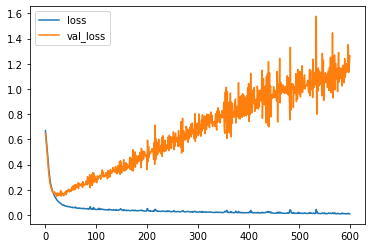

In [21]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [38]:
model = Sequential()

model.add(Dense(30,activation='relu'))

model.add(Dense(15,activation='relu'))

# BINARY CLASSIFICATION
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [39]:
from tensorflow.keras.callbacks import EarlyStopping

In [40]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [41]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
         callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 14ms/step - loss: 0.6681 - val_loss: 0.6230
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6198 - val_loss: 0.5817
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5658 - val_loss: 0.5281
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5227 - val_loss: 0.4611
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4510 - val_loss: 0.3947
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3935 - val_loss: 0.3389
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.3385 - val_loss: 0.2949
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.2992 - val_loss: 0.2564
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.2574 - val_loss: 0.2311
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.2526 - val_loss: 0.2084
Epoch 11

<AxesSubplot:>

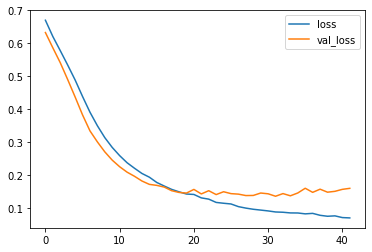

In [33]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [35]:
from tensorflow.keras.layers import Dropout

model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

# BINARY CLASSIFICATION
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [36]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
         callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 15ms/step - loss: 0.6999 - val_loss: 0.6756
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6809 - val_loss: 0.6511
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6504 - val_loss: 0.6073
Epoch 4/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6136 - val_loss: 0.5639
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5656 - val_loss: 0.5318
Epoch 6/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6009 - val_loss: 0.5060
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5461 - val_loss: 0.4723
Epoch 8/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5247 - val_loss: 0.4417
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4756 - val_loss: 0.4122
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.4878 - val_loss: 0.3818
Epoch 11

<AxesSubplot:>

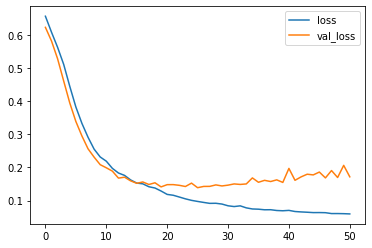

In [42]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [44]:
predictions = model.predict_classes(X_test)

In [46]:
from sklearn.metrics import classification_report,confusion_matrix

In [47]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93        55
           1       0.99      0.92      0.95        88

    accuracy                           0.94       143
   macro avg       0.94      0.95      0.94       143
weighted avg       0.95      0.94      0.94       143



In [49]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 7 81]]
